#Numerical Solutions for DEs HW2

YANG, Ze (5131209043)


## Problem 4: The non-linear pendulum.

In [13]:
%matplotlib inline
from __future__ import division
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

f_s = lambda q: -np.sin(q)
g_s = lambda p: p
H_1 = lambda p,q: 0.5*p*p + np.cos(q)

def explicit_euler_solve(f, g, n, t0, t1, p0, q0):
    """
    explicit euler method, solve separable Hamiltonian system 
    p'(t)=-D_q H, q'(t)=D_p H, p(t_0)=p_0, q(t_0)=q_0 by
    
    p_{n+1} <- p_{n} + hf(p_n, q_n).
    q_{n+1} <- q_{n} + hg(p_n, q_n).
    @param f: a function of p and q, which is the - gradient of H wrt q,
        and the derivative of p.
    @param g: a function of p and q, which is the gradient of H wrt p,
        and the derivative of q.
    @param n: the number of steps.
    @param t0, p0, q0: the initial value.
    @param t1: the other end to which we generate numerical solution
    
    @return t: the np.array {t_k}_1^n
    @return y: the np.array {y_k}_1^n
    """
    h = (t1 - t0) / n
    t = np.linspace(t0, t1, n+1)
    p, q = np.zeros(n+1), np.zeros(n+1)
    p[0], q[0] = p0, q0
    for k in range(n):
        p[k+1] = p[k] + h*f(q[k])
        q[k+1] = q[k] + h*g(p[k])
    return t, p, q


def symplectic_euler_solve(f, g, n, t0, t1, p0, q0):
    """
    semi-implicit euler method, solve separable Hamiltonian system 
    p'(t)=-D_q H, q'(t)=D_p H, p(t_0)=p_0, q(t_0)=q_0, 
    in which H(p, q) = T(p) + V(q), by
    
    p_{n+1} <- p_{n} + hf(p_{q_n).
    q_{n+1} <- q_{n} + hg(p_{n+1}).
    @param f: a function of q, which is the - gradient of H wrt q,
        and the derivative of p.
    @param g: a function of p, which is the gradient of H wrt p,
        and the derivative of q.
    @param n: the number of steps.
    @param t0, p0, q0: the initial value.
    @param t1: the other end to which we generate numerical solution
    
    @return t: the np.array {t_k}_1^n
    @return y: the np.array {y_k}_1^n
    """
    h = (t1 - t0) / n
    t = np.linspace(t0, t1, n+1)
    p, q = np.zeros(n+1), np.zeros(n+1)
    p[0], q[0] = p0, q0
    for k in range(n):
        p[k+1] = p[k] + h*f(q[k])
        q[k+1] = q[k] + h*g(p[k+1])
    return t, p, q


def hamilton_error(H_func, result, H_exact):
    """
    calcuate the error in Hamilton function.
    @param H_func: the hamilton function H = H(p, q)
    @param result: the result of numerical calculation y = (p, q)
    @param H_exact: the exact value of H, which is a constant.
    """
    n = len(result[0])
    err = []
    for k in range(n):
        pk, qk = result[0][k], result[1][k]
        err.append(H_func(pk, qk) - H_exact)
    return err

In [75]:
if __name__ == '__main__':
    p0, q0 = 0, 1
    n, h = 300, 1/5
    t1, p1, q1 = explicit_euler_solve(f_s, g_s, n, 0, n*h, 0, 1)
    err_1 = hamilton_error(H_1, (p1, q1), H_1(p0, q0))

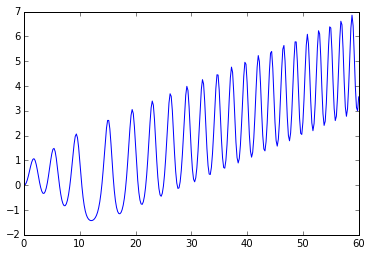

In [76]:
plt.plot(t1, err_1)

In [70]:
if __name__ == '__main__':
    p0, q0 = 0, 1
    n, h = 300, 1/5
    t2, p2, q2 = symplectic_euler_solve(f_s, g_s, n, 0, n*h, 0, 1)
    err_2 = hamilton_error(H_1, (p2, q2), H_1(p0, q0))

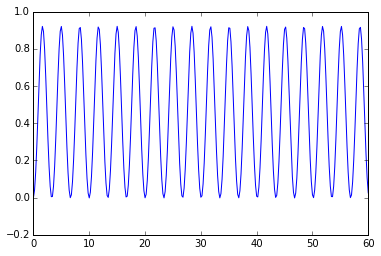

In [71]:
plt.plot(t2, err_2)

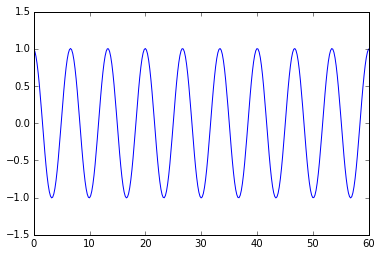

In [72]:
plt.plot(t2, q2)

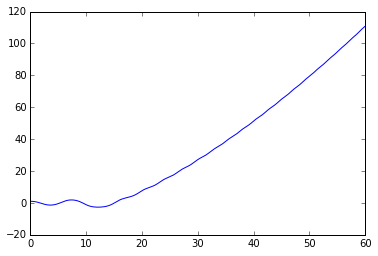

In [74]:
plt.plot(t1, q1)

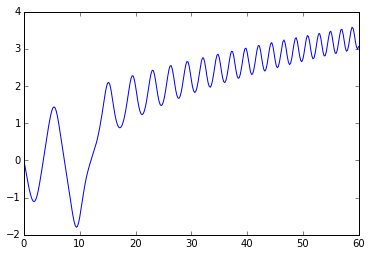

In [77]:
plt.plot(t1, p1)

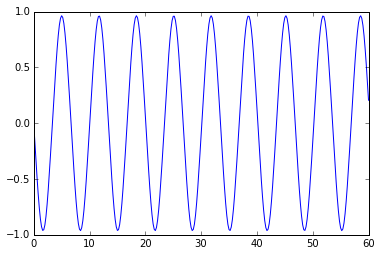

In [78]:
plt.plot(t2, p2)